In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "travelq.csv"  # Change this to the correct path
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126761 entries, 0 to 126760
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ref_number              126759 non-null  object 
 1   disclosure_group        105235 non-null  object 
 2   title_en                126053 non-null  object 
 3   title_fr                126027 non-null  object 
 4   name                    126213 non-null  object 
 5   purpose_en              126743 non-null  object 
 6   purpose_fr              126650 non-null  object 
 7   start_date              126761 non-null  object 
 8   end_date                125957 non-null  object 
 9   destination_en          126113 non-null  object 
 10  destination_fr          126045 non-null  object 
 11  airfare                 122129 non-null  float64
 12  other_transport         123310 non-null  float64
 13  lodging                 124301 non-null  float64
 14  meals               

ref_number disclosure_group                 title_en  \
0  T-20120-P11-001              SLE  Chief Executive Officer   
1  T-2020-P11-0001              SLE                    Chair   
2  T-2020-P11-0002              SLE               Vice Chair   
3  T-2020-P11-0003              SLE       Board Of Directors   
4  T-2020-P11-0004              SLE      Board Of Directors    

                         title_fr                 name  \
0     Président directeur-général     Philip Rizcallah   
1                       Président  Bérubé, Paul-Claude   
2                 vice-présidente           Reid, Mary   
3  Membre du conseil de direction   McLaughlin, Joseph   
4  Membre du conseil de direction        Haan, Maureen   

                                          purpose_en  \
0  To attend meeting with Saskatchewan Provincial...   
1                              Board members meeting   
2                              Board members meeting   
3                              Board members meeting   
4                              Board members meeting   

                                          purpose_fr  start_date    end_date  \
0  Pour assister à une réunion avec le gouverneme...  2020-02-03  2020-02-04   
1                                Réunion du conseil   2020-02-09  2020-02-13   
2                                Réunion du conseil   2020-02-09  2020-02-14   
3                                Réunion du conseil   2020-02-09  2020-02-12   
4                                Réunion du conseil   2020-02-09  2020-02-12   

                        destination_en  ...  airfare  other_transport  \
0         Regina, Saskatchewan, Canada  ...   646.17           117.26   
1  Vancouver, British Columbia, Canada  ...  1104.27           189.72   
2  Vancouver, British Columbia, Canada  ...  2511.31           132.48   
3  Vancouver, British Columbia, Canada  ...      NaN            58.32   
4  Vancouver, British Columbia, Canada  ...   880.99           192.76   

   lodging   meals  other_expenses    total  additional_comments_en  \
0   157.78  197.25             0.0  1118.46                     NaN   
1   841.31  461.84             NaN  2597.14                     NaN   
2   785.65  591.00           108.3  4128.74                     NaN   
3   630.99  264.60           123.0  1076.91                     NaN   
4   630.99  332.45             NaN  2037.19                     NaN   

  additional_comments_fr    owner_org  \
0                    NaN  casdo-ocena   
1                    NaN  casdo-ocena   
2                    NaN  casdo-ocena   
3                    NaN  casdo-ocena   
4                    NaN  casdo-ocena   

                                     owner_org_title  
0  Accessibility Standards Canada | Normes d’acce...  
1  Accessibility Standards Canada | Normes d’acce...  
2  Accessibility Standards Canada | Normes d’acce...  
3  Accessibility Standards Canada | Normes d’acce...  
4  Accessibility Standards Canada | Normes d’acce...  

[5 rows x 21 columns]

The most expensive trip in the dataset belongs to John Murray, totaling `$51,393.34`. This is significantly higher than the second most expensive trip at `$38,983.15`. Interestingly, Global Affairs Canada appears multiple times in the top 10, suggesting that diplomatic and international engagements drive up travel costs. The high expenses could be due to multi-country visits, extended stays, or premium travel requirements. Further analysis into airfare, lodging, and transportation costs for these trips could provide insights into why they are so costly

In [2]:
# Top 10 most expensive trips
top_expensive_trips = df.sort_values(by="total", ascending=False).head(10)

# Display relevant columns
top_expensive_trips[["name", "owner_org_title", "destination_en", "total"]]

name                                    owner_org_title  \
26597      Murray, John  College of Immigration and Citizenship Consult...   
76689       Heidi Hulan  Global Affairs Canada | Affaires mondiales Canada   
26391      Murray, John  College of Immigration and Citizenship Consult...   
76256       Heidi Hulan  Global Affairs Canada | Affaires mondiales Canada   
67523  Melissa Lantsman  Global Affairs Canada | Affaires mondiales Canada   
75144    Dominic Barton  Global Affairs Canada | Affaires mondiales Canada   
67521      Paul Terrien  Global Affairs Canada | Affaires mondiales Canada   
67531   Lawrence Cannon  Global Affairs Canada | Affaires mondiales Canada   
75459    Bruce Christie  Global Affairs Canada | Affaires mondiales Canada   
92443     Boivin, Steve               National Defence | Défense nationale   

                                          destination_en     total  
26597                           Toronto, Ontario, Canada  51393.34  
76689                                Vilnius and Jakarta  38983.15  
26391                           Toronto, Ontario, Canada  38516.95  
76256                                              Japan  38248.20  
67523  Kazakhstan, UAE, Afghanistan, Vietnam and Hong...  37957.87  
75144                              Ottawa and Washington  37327.94  
67521  Kazakhstan, UAE, Afghanistan, Vietman and Hong...  37213.84  
67531  Kazakhstan, UAE, Afghanistan, Vietnam and Hong...  36944.79  
75459                    Singapore and Sydney, Australia  33351.54  
92443    Canberra & Sydney, Australia / Honolulu, Hawaii  32539.97

This summary shows that John Murray has spent the most on a single trip, with a total of $51,393.34, compared to the others.

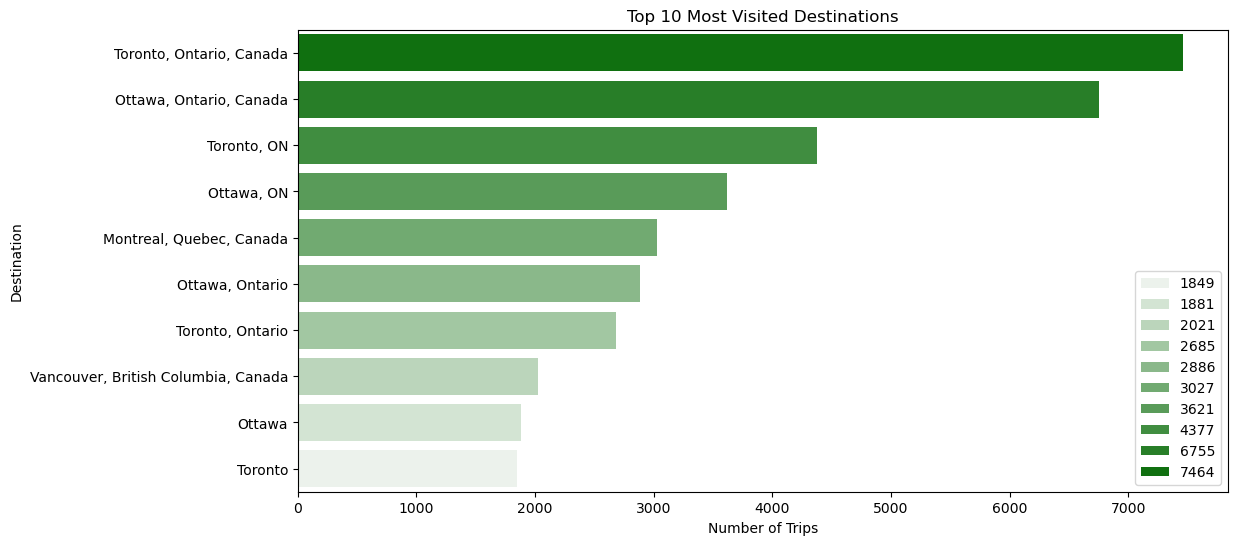

In [4]:
# Count the top 10 most visited destinations
top_destinations = df["destination_en"].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_destinations.values, y=top_destinations.index, 
            palette=sns.light_palette("green", reverse=False, n_colors=len(top_destinations)), 
            hue=top_destinations.values)
plt.xlabel("Number of Trips")
plt.ylabel("Destination")
plt.title("Top 10 Most Visited Destinations")

plt.show()

Toronto appears as the most visited destination for government travel, followed closely by Ottawa. However, the dataset contains duplicate listings, such as variations in spelling or additional location details. This could slightly skew the rankings. The high number of visits to Toronto and Ottawa suggests that a large portion of government travel is domestic, likely for administrative meetings, policy discussions, and federal coordination. It would be valuable to compare these findings against international travel destinations to understand the scope of foreign engagements

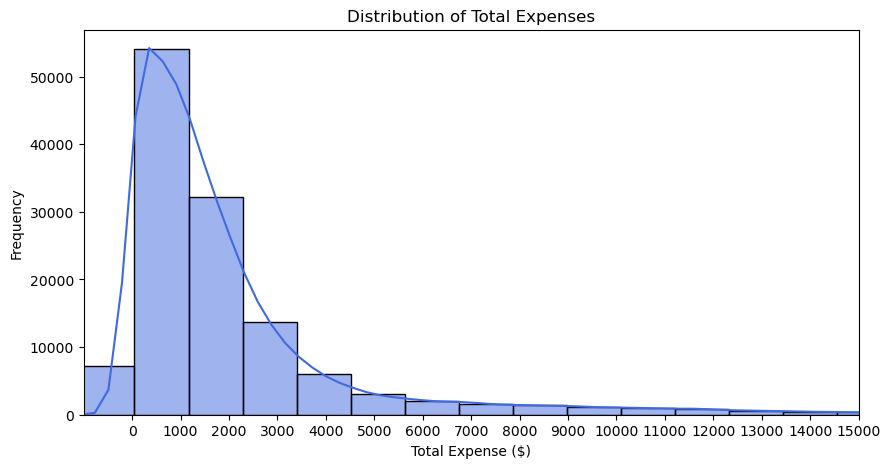

In [16]:
# Histogram of total expenses
plt.figure(figsize=(10,5))
sns.histplot(df["total"], bins=50, kde=True, color="royalblue")
plt.xlabel("Total Expense ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Expenses")

plt.xticks(ticks=range(0, int(df["total"].max()) + 1000, 1000))
plt.xlim(-1000, 15000)

plt.show()

The distribution of total expenses shows that the majority of trips cost under `$1,000`, with a steep decline in frequency as costs rise. This suggests that most government trips are short and relatively inexpensive. However, a few trips exceed `$50,000` (have limited the graph to show a better visualization for the lower cost trips), indicating special cases of high expenditure. These could be long-term assignments, international diplomatic missions, or large delegation travels. The presence of extreme outliers could impact the overall budget analysis, and it may be necessary to investigate whether these costs align with standard travel policies.

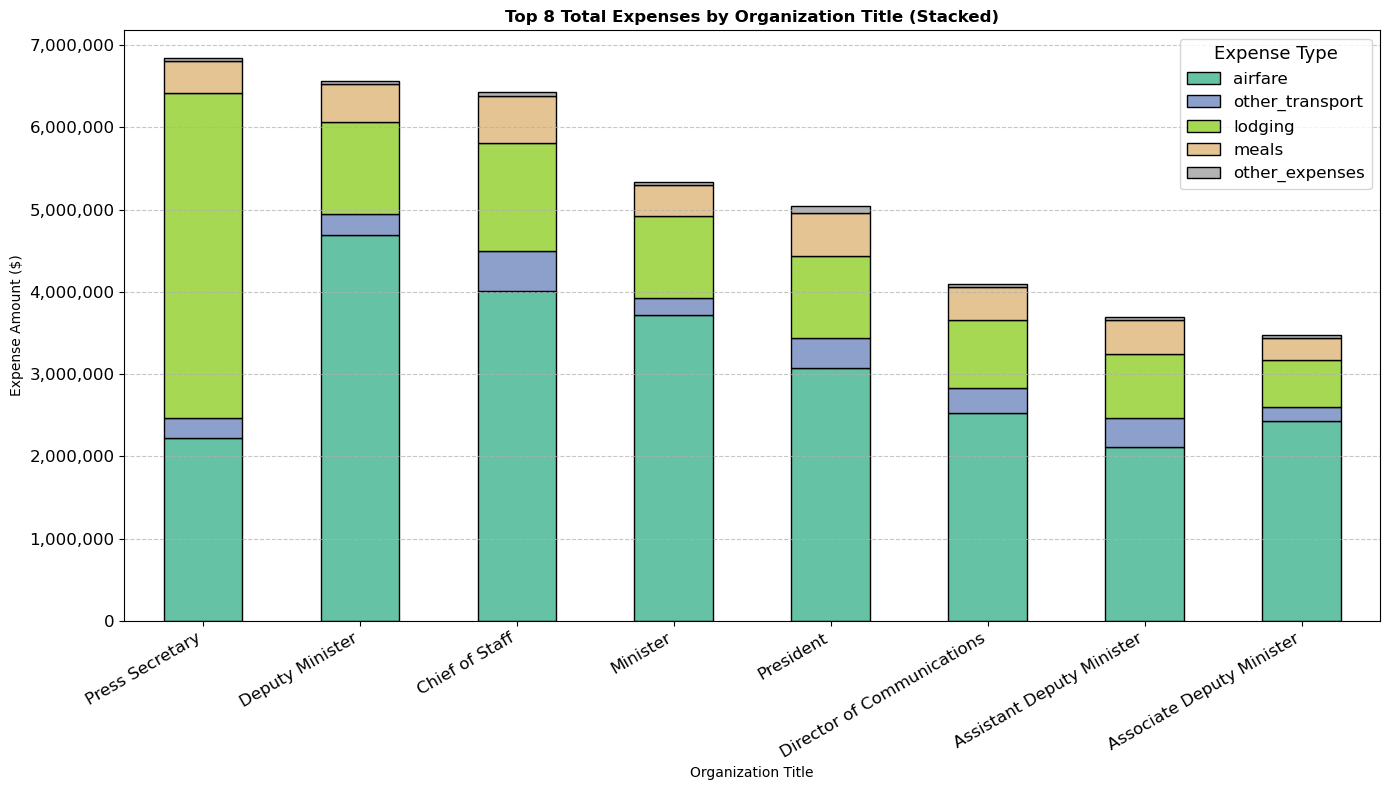

In [26]:
#Top 8 organizations based on total expenses
expense_columns = ['airfare', 'other_transport', 'lodging', 'meals', 'other_expenses']

grouped_expenses = df.groupby('title_en')[expense_columns].sum()

top_titles = grouped_expenses.sum(axis=1).sort_values(ascending=False).head(8).index
top_expenses = grouped_expenses.loc[top_titles]

ax = top_expenses.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="Set2", edgecolor="black")

plt.title("Top 8 Total Expenses by Organization Title (Stacked)", fontweight="bold")
plt.xlabel("Organization Title")
plt.ylabel("Expense Amount ($)")

plt.xticks(rotation=30, ha="right", fontsize=12)
plt.yticks(fontsize=12)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.legend(title="Expense Type", fontsize=12, title_fontsize=13, loc="upper right")

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

The stacked bar chart displays the total expenses for the top eight government organization titles, broken down by expense type (airfare, lodging, transport, meals, and other expenses). The Press Secretary, Deputy Minister, and Chief of Staff have the highest total expenses, each exceeding $6 million, indicating frequent and possibly international travel. Airfare and lodging account for the majority of costs across all positions, highlighting that these roles require extensive travel.

The Minister and President roles also have substantial expenses but slightly lower compared to the top three, suggesting that while they travel often, their lodging or meal costs may be more controlled. Interestingly, Assistant Deputy Ministers and Associate Deputy Ministers show significantly lower expenses, indicating that their travel may be more localized or less frequent.

Anomalies could exist due to differences in trip duration, class of travel, or international vs. domestic flights. Further analysis into individual expense reports or justification documents would provide better insights into why some roles incur higher travel costs than others. Addressing potential cost inefficiencies, such as reviewing lodging choices or transport expenses, could lead to significant budget optimizations in government spending.